# Cumulative app version of fig 3

Cumulative yield

In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib widget

In [42]:
import pandas as pd

import seaborn as sns

from math import log

import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# from xgboost import XGBRegressor
# import shap


from plots2.fns import (
    get_corner_annotations,
    get_corner_annotations_custom_labels,
    # get_corner_annotations_explicit
)

from plots2.consts import (
    SMALL_FONT,
    MEDIUM_FONT,
    BIGGER_FONT,
    SHAP_BLUE
)

from poly2.utils import trait_vec, gamma_dist
# from poly2.run import no_joblib_single_run, no_joblib_multiple_run
from poly2.config import Config, ConfigMixture, get_asymptote_config
from poly2.simulator import SimulatorOneTrait, SimulatorAsymptote

In [3]:
df = pd.read_csv('../outputs/combined/processed_scan_cumulative.csv')

df.head()

,run,year,dose,yld,cum_yld,mu,b,asymptote,dec_rate_multiplier,m_prop_multiplier,m_scale_multiplier,ME_mean
0,0.0,1.0,1.0,10.021293,10.021293,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
1,0.0,2.0,1.0,10.021275,20.042568,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
2,0.0,3.0,1.0,10.021238,30.063805,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
3,0.0,4.0,1.0,10.021156,40.084961,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241
4,0.0,5.0,1.0,10.020970,50.105931,17.879734,2.744068,0.602763,1.786355,0.703574,1.95789,0.398241


## Yield plot

In [41]:
cf = Config(n_k=300, n_years=1)

CONFIG
------
I0s = [0.00985703]
asymptote = None
betas = [0.00786542]
decay_rate = None
doses = [1.]
fungicide_mixture = False
host_on = None
k_b = 0.8431572316700577
k_mu = 9.44286788381916
l_b = 6.585357214619326
l_mu = 0.8089358816813786
mutation_proportion = 1.234375e-05
mutation_scale_fung = 0.0019836158401698102
mutation_scale_host = 0.0019836158401698102
n_k = 300
n_l = 50
n_years = 1
replace_cultivars = None
sprays = None



In [44]:
data = SimulatorOneTrait(cf).run_model()

In [51]:
DEFAULT_YIELD = data['yield_vec'][0]

In [37]:
plt.rc('font', size=SMALL_FONT)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_FONT)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_FONT)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_FONT)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_FONT)    # legend fontsize

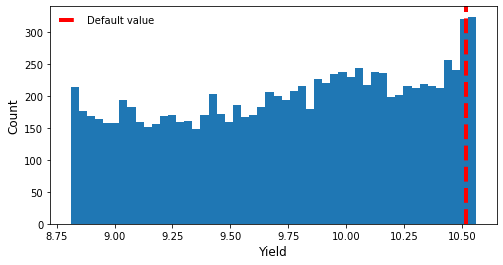

In [57]:
f, ax = plt.subplots(figsize=(8,4))

(
    df
    .loc[lambda x: x.year==1]
    .loc[:, ['yld']]
    .reset_index(drop=True)
    .hist('yld', bins=50, ax=ax)
)

ax.axvline(DEFAULT_YIELD, c='r', ls='--', lw=4, label='Default value')

ax.grid(False)
ax.set_title(None)
ax.set_xlabel('Yield')
ax.set_ylabel('Count')

ax.legend(loc=2, frameon=False)

# Save

In [58]:
f.savefig('../figures/paper/app3_y_fig1.jpg', dpi=300, bbox_inches="tight")